# Определение скорости звука разными методами
## Дифракционная картина

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Деления винта (для перевода Y)
vint_del = 400 #мкм

In [11]:
#Частоты
nu_1 = 1.09 #mHz
nu_2 = 1.2 #mHz
nu_3 = 1.4 #mHz

Данные для первого эксперимент в формате $(m, Y)$

In [12]:
data1 =[[-3, 8.16],[-2, 8.44], [-1, 8.79], [0, 9.15], [1, 9.45], [2, 9.79], [3, 10]]

In [13]:
data2 = [[-3, 8.03], [-2, 8.36], [-1,8.74], [0, 9.13], [1, 9.49], [2, 9.87], [3, 10.13]]

In [14]:
data3 = [[-2, 8.28], [-1, 8.7], [0, 9.15], [1, 9.57], [2, 10]]

In [15]:
d1 = pd.DataFrame(data=data1, columns=['m', 'Y'])
d2 = pd.DataFrame(data=data2, columns=['m', 'Y'])
d3 = pd.DataFrame(data=data3, columns=['m', 'Y'])

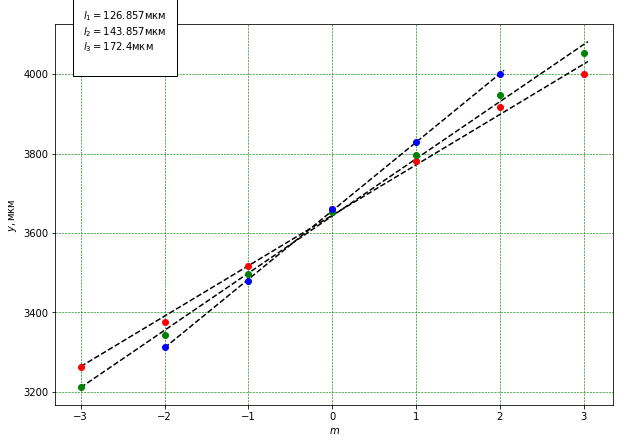

In [30]:
plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots()
ax.grid(color='g', linestyle='--', linewidth=0.6)
ax.grid(color='g', linestyle='--', linewidth=0.1, which = 'minor' )
plt.xlabel(r'$m$')
plt.ylabel(r'$y,$' + u'мкм')

k1, x_01   = np.polyfit(d1['m'], vint_del*d1['Y'], 1)
k2, x_02   = np.polyfit(d2['m'], vint_del*d2['Y'], 1)
k3, x_03   = np.polyfit(d3['m'], vint_del*d3['Y'], 1)
label = r'$l_1 = {}$'.format(round(k1,3)) + u'мкм' + '\n' + r'$l_2 = {}$'.format(round(k2,3)) + u'мкм' + '\n' + r'$l_3 = {}$'.format(round(k3,3)) + u'мкм' + '\n'
ax.text(0.05, 0.9, label, transform=ax.transAxes, bbox={'facecolor':'white', 'edgecolor':'black', 'pad':10})


plt.errorbar(d1['m'], vint_del*d1['Y'],xerr=None, yerr=0.01, fmt='o', color='red')

plt.plot(np.arange(-3, 3.1,0.05),  k1*np.arange(-3,3.1, 0.05) + x_01, 'k--')

plt.errorbar(d2['m'], vint_del*d2['Y'],xerr=None, yerr=0.01, fmt='o', color='green')

plt.plot(np.arange(-3, 3.1,0.05),  k2*np.arange(-3,3.1, 0.05) + x_02, 'k--')

plt.errorbar(d3['m'], vint_del*d3['Y'],xerr=None, yerr=0.01, fmt='o', color='blue')

plt.plot(np.arange(-2, 2.1,0.05),  k3*np.arange(-2,2.1, 0.05) + x_03, 'k--')
plt.savefig('speed_by_difr.png')
plt.show()

$l_m = mf \dfrac{\lambda}{\Lambda}$

In [17]:
f = 280000 #мкм - фокусное расстония О2
lambda_red = 0.64 #мкм ± 0.02

In [18]:
L1 = f*lambda_red / k1
L2 = f*lambda_red / k2
L3 = f*lambda_red / k3

In [19]:
L1err = L1 * (200/6400. + 0.01/d1['Y'].mean())
L2err = L2 * (200/6400. + 0.01/d2['Y'].mean())
L3err = L3 * (200/6400. + 0.01/d3['Y'].mean())

In [20]:
#длина ультразвуковой волны
print round(L1), r'$\pm$', round(L1err), u'мкм'
print round(L2), r'$\pm$', round(L2err), 'мкм'
print round(L3), r'$\pm$', round(L3err), u'мкм'

1413.0 $\pm$ 46.0 мкм
1246.0 $\pm$ 40.0 мкм
1039.0 $\pm$ 34.0 мкм


In [21]:
# скорость звука и средняя скорость
print round(L1*nu_1), L2*nu_2, L3*nu_3
print np.array([L1*nu_1, L2*nu_2, L3*nu_3]).mean().round(3), 'м/с'

1540.0 1494.8162859980132 1455.2204176334096
1496.595 м/с


## Метод темного поля

In [22]:
scale = 4/1.64

Данные для второго эксперимента в формате $(\nu, l, r, m)$

In [23]:
data = [[1, 1.38, 3.22, 6], [1.08, 1.08, 3.08, 7], [1.17, 0.94, 3.04, 8], [1.24, 0.94, 3.42, 10], [1.35, 0.9, 3.42, 11] , [1.45, 1.06, 3, 9]]

In [24]:
d = pd.DataFrame(data = data, columns=['freq', 'l', 'r', 'm'])

In [25]:
d['len'] = d.apply(lambda row: 2*(row['r'] - row['l'])*scale/row['m'] , axis = 1)

In [26]:
d['lenerr'] = d.apply(lambda row: row['len'] * (0.01/row['r'] + 0.01/row['l']), axis = 1)
d['freqerr'] = d.apply(lambda row: 0.005, axis = 1)
                      

In [31]:
d

,freq,l,r,m,len,lenerr,freqerr
0,1.00,1.38,3.22,6,1.495935,0.015486,0.005
1,1.08,1.08,3.08,7,1.393728,0.017430,0.005
2,1.17,0.94,3.04,8,1.280488,0.017834,0.005
3,1.24,0.94,3.42,10,1.209756,0.016407,0.005
4,1.35,0.90,3.42,11,1.117517,0.015684,0.005
5,1.45,1.06,3.00,9,1.051491,0.013425,0.005


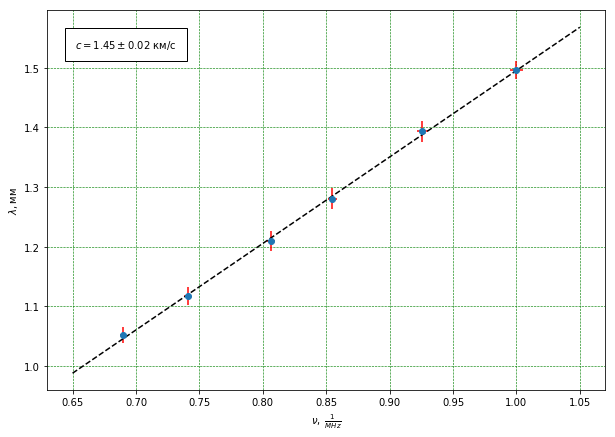

In [32]:
import numpy as np

plt.rcParams["figure.figsize"] = (10,7)
fig, ax = plt.subplots()
ax.grid(color='g', linestyle='--', linewidth=0.6)
ax.grid(color='g', linestyle='--', linewidth=0.1, which = 'minor' )
plt.xlabel(r'$\nu,\ \frac{1}{MHz}$')
plt.ylabel(r'$\lambda,$' + u'мм')

k, x_0 = np.polyfit(1./d['freq'], d['len'], 1)


xerr = d['freqerr']/(d['freq']**2)
plt.errorbar(1./d['freq'], d['len'], xerr=xerr, yerr=d['lenerr'], fmt='o', ecolor='red')
er = (xerr.mean()*d['freqerr'].mean() + d['lenerr'].mean()/d['len'].mean())*k

label = r'$c = {} \pm {}$ '.format(round(k,3), round(er,2)) + u'км/с'
ax.text(0.05, 0.9, label, transform=ax.transAxes, bbox={'facecolor':'white', 'edgecolor':'black', 'pad':10})
plt.plot(np.arange(0.65, 1.06,0.05),  k*np.arange(0.65,1.06, 0.05) + x_0, 'k--')
plt.savefig('speed_by_dark_field.png')
plt.show()